## Day 25 K-Means
20/Jan/2022, Thursday

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Data Generation

In [10]:
X, y = make_blobs(n_samples=400, n_features=2, centers=4, random_state=40)
print(X.shape, y.shape)

(400, 2) (400,)


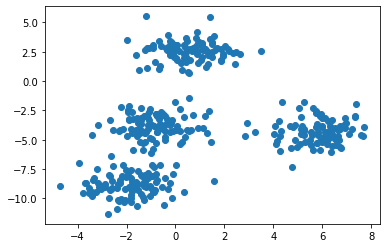

In [12]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### Implementation

In [57]:
class Kmeans:
    
    def __init__(self, k, colors):
        self.k = k
        self.clusters = {i:{} for i in range(self.k)} # int : {'center', 'color', points}
        for i in range(self.k):
            self.clusters[i]['color'] = colors[i]
            self.clusters[i]['points'] = [] # list of index
    
    def plotClusters(self, X, it):
        for i in range(self.k):
            # draw points
            indices = self.clusters[i]['points']
            color = self.clusters[i]['color']
            plt.scatter(X[indices,0], X[indices,1], c=color)

            # draw centers
            center = self.clusters[i]["center"]
            plt.scatter(center[0], center[1], marker="*", c='black')

        plt.title(f"Iteration: {it+1}")
        plt.show()
        
        
    def fit(self, X, itr = 3):
        min_ = X.min(axis=0)
        max_ = X.max(axis=0)
        
        # picking random centers
        for ix in range(self.k):
            center = np.empty((X.shape[1],))
            for j in range(X.shape[1]): # iterating on features
                center[j] = np.random.uniform(min_[j], max_[j])
            self.clusters[ix]['center'] = center
            
        for it in range(itr):
            # assign points to each center
            for i in range(X.shape[0]):
                dist = []
                for ix in range(self.k):
                    d = np.linalg.norm(X[i]-self.clusters[ix]['center'], ord=2, axis=0)
                    dist.append(d)

                label = np.argmin(dist)
                self.clusters[label]['points'].append(i)
                
            # plot Clusters
            self.plotClusters(X, it)

            # update centers of each cluster
            if it != itr-1:
                self.updateCenters(X)
            
    def updateCenters(self, X):
        for i in range(self.k):
            idx = self.clusters[i]['points']
            self.clusters[i]['center'] = X[idx].mean(axis=0)
            self.clusters[i]['points'] = []
        
    def predict(self, X):
        pred = np.empty((len(X),), dtype='int')
        for i in range(self.k):
            idx = self.clusters[i]['points']
            pred[idx] = i
        return pred

In [38]:
colors = ['#fcba03', "#03fcc2", "crimson", "#b30404"]

{0: {'color': '#fcba03', 'points': []}, 1: {'color': '#03fcc2', 'points': []}, 2: {'color': 'crimson', 'points': []}, 3: {'color': '#b30404', 'points': []}}


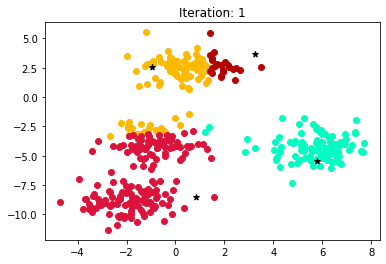

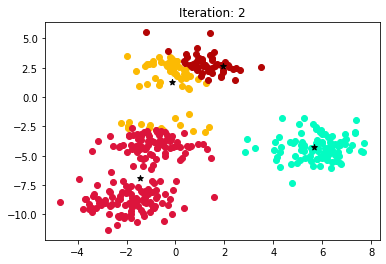

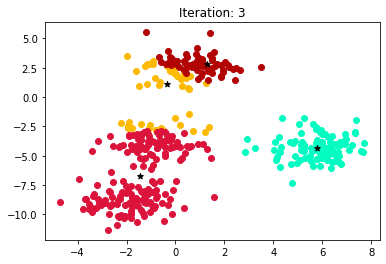

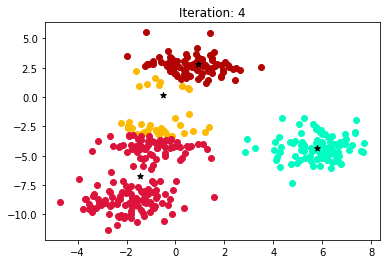

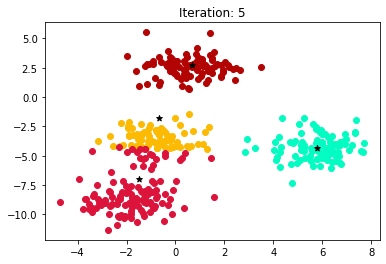

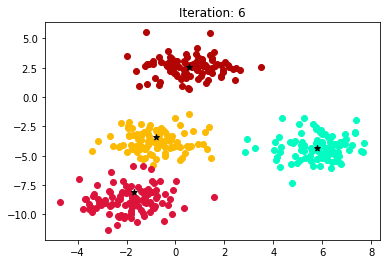

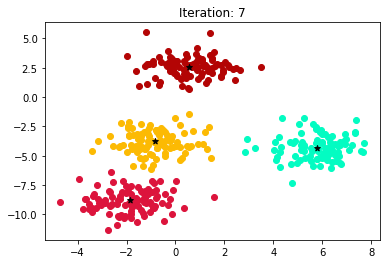

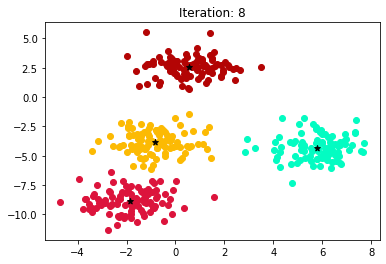

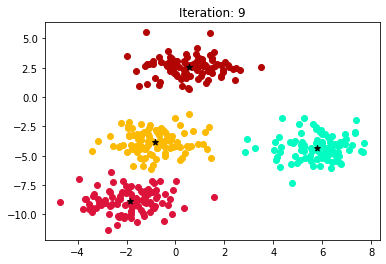

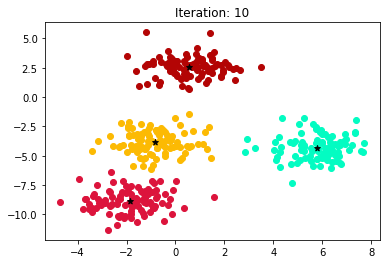

In [61]:
km = Kmeans(4, colors)
print(km.clusters)
km.fit(X,10)
# print(km.clusters)

In [62]:
ypred = km.predict(X)

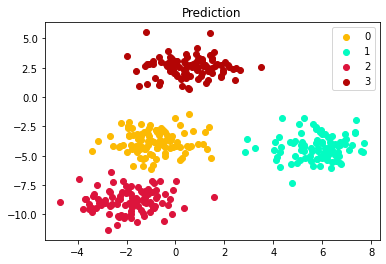

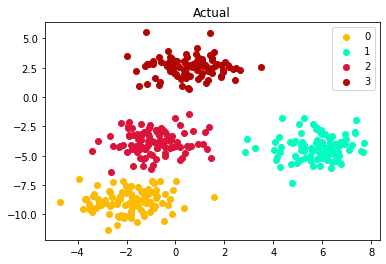

In [68]:
for i in range(0,4):
    idx = (ypred==i)
    plt.scatter(X[idx,0], X[idx,1], c=colors[i], label=i)
plt.legend()
plt.title("Prediction")
plt.show()

for i in range(0,4):
    idx = (y==i)
    plt.scatter(X[idx,0], X[idx,1], c=colors[i], label=i)
plt.legend()
plt.title("Actual")
plt.show()

### Sklearn

In [70]:
from sklearn.cluster import KMeans

In [73]:
kmeans = KMeans(init='k-means++', n_clusters=4)

In [74]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [75]:
ypred = kmeans.predict(X)

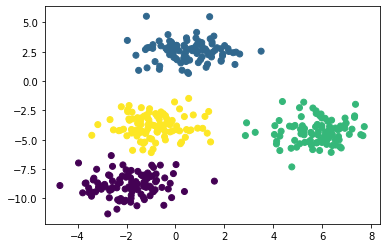

In [77]:
plt.scatter(X[:,0], X[:,1], c=ypred)
plt.show()

In [78]:
from sklearn.datasets import make_moons

In [79]:
X, y = make_moons(n_samples=400, noise=0.1)
print(X.shape, y.shape)

(400, 2) (400,)


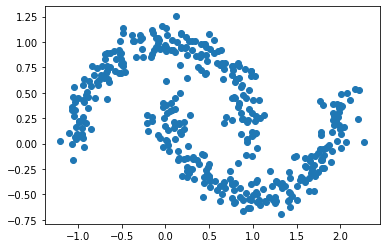

In [81]:
plt.scatter(X[:,0], X[:,1])
plt.show()

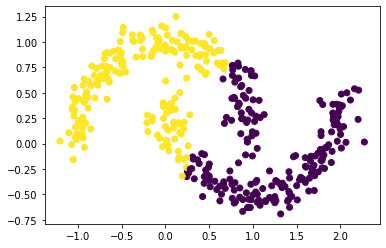

In [84]:
kmeans = KMeans(init='k-means++', n_clusters=2) # Kmeans is failing on non-linear dataset
kmeans.fit(X)
ypred = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=ypred)
plt.show()

In [85]:
from sklearn.cluster import DBSCAN

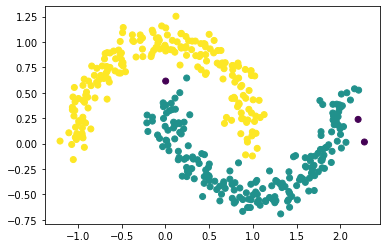

In [99]:
dbscan = DBSCAN(eps=0.18, min_samples=5)
dbscan.fit(X)
ypred = dbscan.labels_
plt.scatter(X[:,0], X[:,1], c=ypred)
plt.show()